x_train_image: (60000, 28, 28)
y_train_image: (60000,)
x_test_image: (10000, 28, 28)
y_test_image: (10000,)


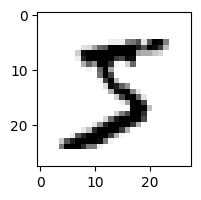

5

In [7]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.utils as np_utils

keras.datasets.mnist.load_data()

(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()
print('x_train_image:', x_Train.shape)
print('y_train_image:', y_Train.shape)
print('x_test_image:', x_Test.shape)
print('y_test_image:', y_Test.shape)

import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap = 'binary')
    plt.show()
    
plot_image(x_Train[0])
y_Train[0]

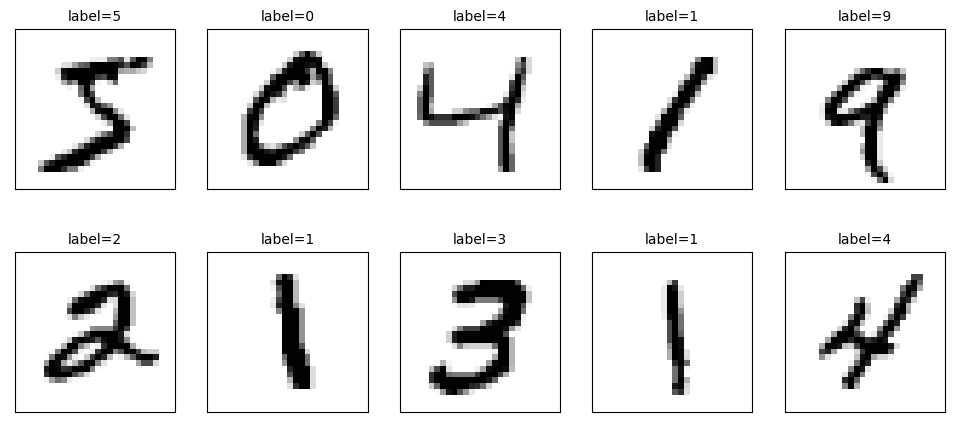

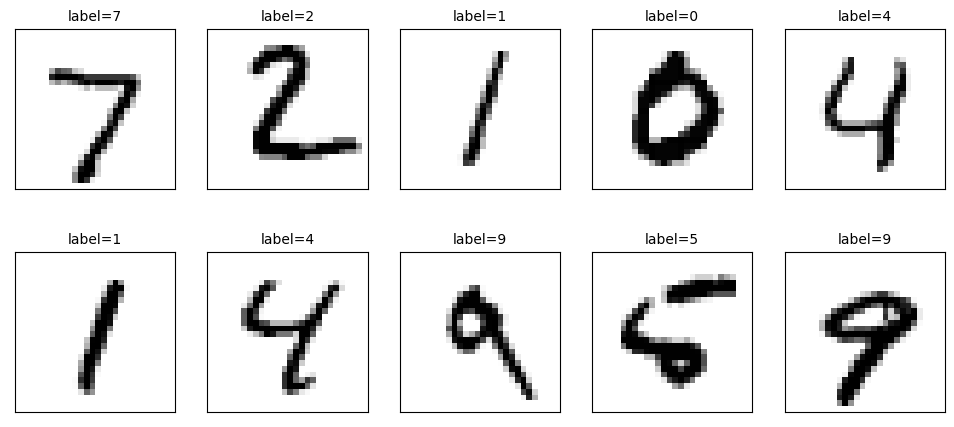

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.utils as np_utils

keras.datasets.mnist.load_data()

(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
plot_images_labels_prediction(x_Train,y_Train,[],0,10)
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)



# 訓練模型

In [23]:

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()

#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))
# 平坦化
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               401536    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

AttributeError: 'Sequential' object has no attribute 'predict_classes'

313/313 [==============================] - 1s 4ms/step


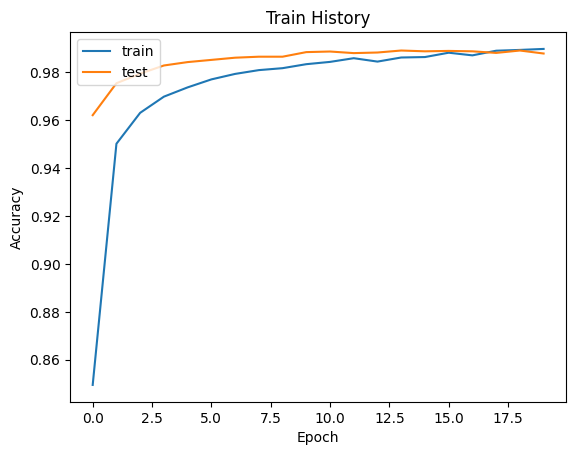

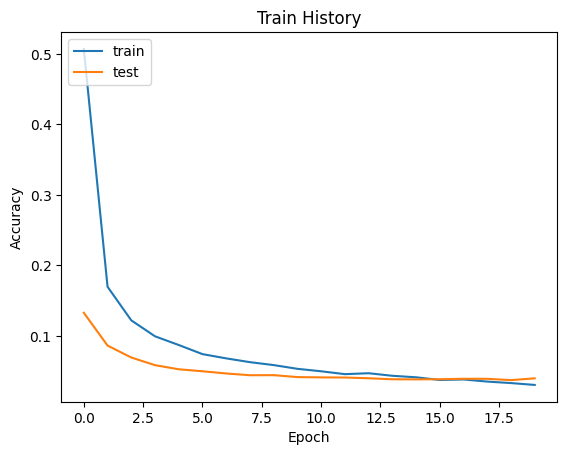

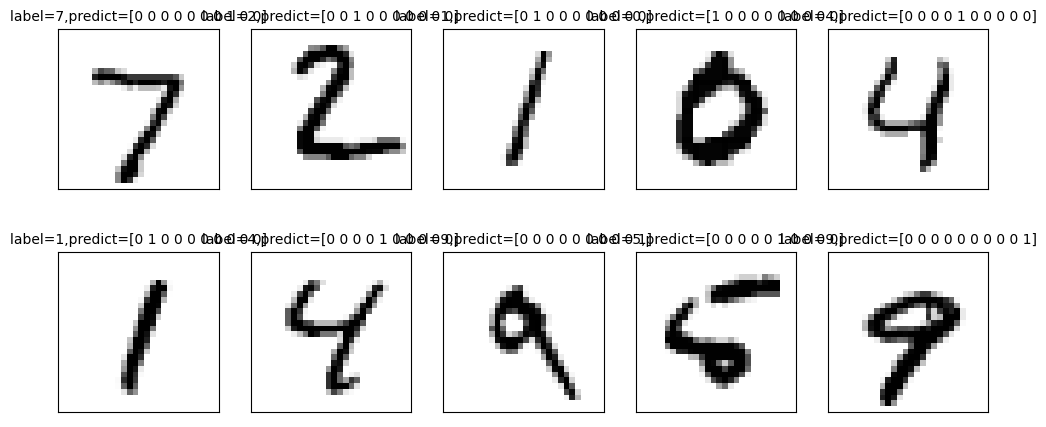

ValueError: Data must be 1-dimensional

In [33]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]
predictions = (model.predict(x_Test4D_normalize) > 0.5).astype("int32")
predictions[:10]

import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')


def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
        if idx >= len(images):
            break
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,predictions,idx=0)

import pandas as pd
pd.crosstab(y_Test,predictions,
            rownames=['label'],colnames=['predict'])
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]
df[(df.label==5)&(df.predict==3)].index
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf #deep learning library
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, Dense, Dropout  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow.keras.utils as np_utils

df = pd.read_csv(r"C:/Users/hsiun/OneDrive/文件/colors_new.csv")

X = df.values[:,:3]
y = df.color.values

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)).astype('int64')
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1)).astype('int64')
print(X_train)
print(y_train)


epochs = 100
batch_size = 100
input_shape = (679, 3, 1)

model = Sequential()

#define the CNN model
model.add(Conv2D(32, kernel_size=(1, 1),
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv1D(64, (1), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(1,1)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 使用 softmax activation function，將結果分類
model.add(Dense(8, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#train the model
model.fit(x = X_train, y = y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_split=0.2)
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# 計算『混淆矩陣』(Confusion Matrix)，顯示測試集分類的正確及錯認總和數
import pandas as pd 
predictions = model.predict_classes(x_test) 
pd.crosstab(y_test_org, predictions, rownames=['實際值'], colnames=['預測值'])

#save model
cnnPickle = open('C:/Users/hsiun/OneDrive/桌面/model/cnn_model', 'wb') 
pickle.dump(model, cnnPickle)


[[[ 53]
  [ 83]
  [110]]

 [[ 41]
  [ 78]
  [108]]

 [[252]
  [246]
  [ 91]]

 ...

 [[113]
  [ 43]
  [ 55]]

 [[ 49]
  [ 81]
  [106]]

 [[119]
  [ 83]
  [ 93]]]
['cyan' 'cyan' 'yellow' 'green' 'red' 'yellow' 'yellow' 'blue' 'white'
 'yellow' 'cyan' 'magenta' 'green' 'blue' 'blue' 'magenta' 'white' 'blue'
 'magenta' 'yellow' 'red' 'magenta' 'magenta' 'green' 'magenta' 'magenta'
 'yellow' 'blue' 'white' 'cyan' 'red' 'blue' 'red' 'blue' 'white'
 'magenta' 'yellow' 'yellow' 'white' 'magenta' 'white' 'yellow' 'green'
 'magenta' 'yellow' 'red' 'yellow' 'blue' 'blue' 'blue' 'white' 'red'
 'cyan' 'magenta' 'black' 'cyan' 'black' 'magenta' 'blue' 'magenta' 'blue'
 'blue' 'magenta' 'blue' 'white' 'yellow' 'cyan' 'magenta' 'magenta'
 'blue' 'red' 'yellow' 'black' 'magenta' 'magenta' 'yellow' 'red' 'yellow'
 'magenta' 'yellow' 'yellow' 'blue' 'green' 'red' 'green' 'red' 'black'
 'red' 'cyan' 'green' 'magenta' 'magenta' 'cyan' 'magenta' 'magenta'
 'magenta' 'red' 'magenta' 'magenta' 'blue' 'red' '

ValueError: in user code:

    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hsiun\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 679, 3, 1), found shape=(None, 3, 1)
